In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(56,(3,3),input_shape=data.shape[1:],kernel_initializer = 'orthogonal')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(28,(3,3),kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(14,(3,3),kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 56)        560       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 56)        224       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 56)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 56)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 28)        14140     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 28)        112       
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 28)        0

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)


In [4]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                         horizontal_flip=True,fill_mode="nearest")

In [5]:
bs=32

history=model.fit(aug.flow(train_data,train_target,batch_size=bs),steps_per_epoch=len(train_data)//bs,
                  validation_data=(test_data,test_target),validation_steps=len(test_data)//bs,epochs=10)

Epoch 1/10
701/701 [==============================] - 72s 100ms/step - loss: 0.7808 - accuracy: 0.5141 - val_loss: 0.6655 - val_accuracy: 0.6104
Epoch 2/10
701/701 [==============================] - 68s 97ms/step - loss: 0.6717 - accuracy: 0.5917
Epoch 3/10
701/701 [==============================] - 73s 104ms/step - loss: 0.6483 - accuracy: 0.6243
Epoch 4/10
701/701 [==============================] - 78s 111ms/step - loss: 0.6265 - accuracy: 0.6535
Epoch 5/10
701/701 [==============================] - 81s 116ms/step - loss: 0.5977 - accuracy: 0.6791
Epoch 6/10
701/701 [==============================] - 83s 119ms/step - loss: 0.5796 - accuracy: 0.6989
Epoch 7/10
701/701 [==============================] - 76s 108ms/step - loss: 0.5590 - accuracy: 0.7167
Epoch 8/10
701/701 [==============================] - 68s 98ms/step - loss: 0.5574 - accuracy: 0.7187
Epoch 9/10
701/701 [==============================] - 66s 94ms/step - loss: 0.5435 - accuracy: 0.7264
Epoch 10/10
701/701 [=============

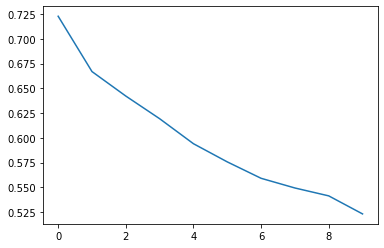

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

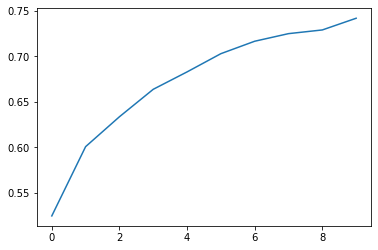

In [7]:
plt.plot(history.history['accuracy'])
#if not working replace 'accuracy' with 'acc'

In [8]:
print(model.evaluate(test_data,test_target))

78/78 [==============================] - 1s 16ms/step - loss: 0.6146 - accuracy: 0.6553
[0.6146188974380493, 0.6553106307983398]


In [9]:
model.save_weights(' test cat&dog.h5')